In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape of the dataset :",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Shape of the dataset : None


#DATA CLEAN AND HANDLE MISSING VALUE 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
df.shape

(891, 12)

In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [41]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [42]:
df['Pclass'].unique()

array([3, 1, 2])

In [43]:
df['Survived'].unique()

array([0, 1])

In [44]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [45]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
#fill missing values with median 
df['Age'].fillna(df['Age'].median(), inplace=False)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=False)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [15]:
df.drop('Cabin',axis=1, inplace=True)

In [16]:
df.drop(['Ticket','Name'],axis=1, inplace = True)

In [17]:
#Encode Sex and Embarked 
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'S':0,'C':1 , 'Q':2})

In [18]:
#Check final missing values 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#STATISTICAL METHOD

In [19]:
df.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [20]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [21]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [23]:
df.groupby('Sex')['Survived'].median()

Sex
0    0.0
1    1.0
Name: Survived, dtype: float64

In [24]:
df.groupby('Pclass')['Survived'].median()

Pclass
1    1.0
2    0.0
3    0.0
Name: Survived, dtype: float64

#VISUALIZATION 

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


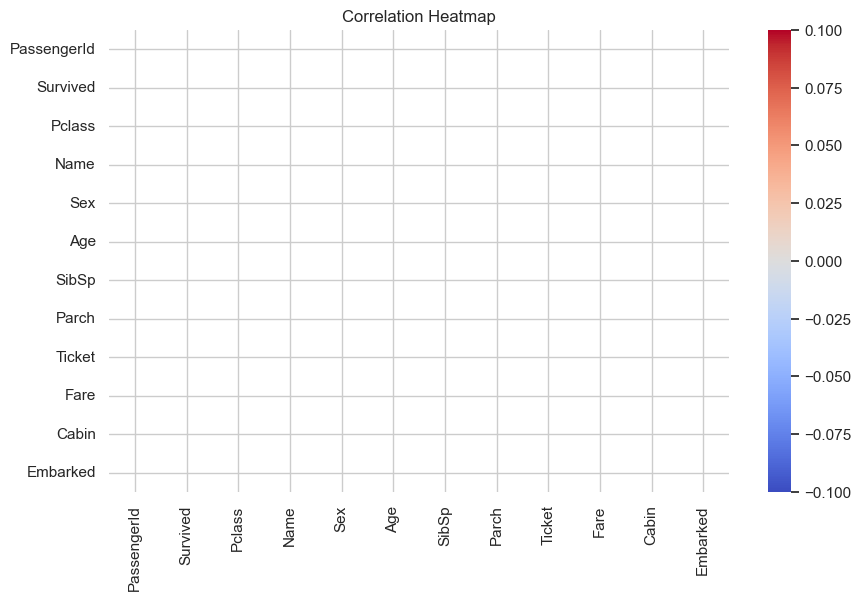

In [7]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna()
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


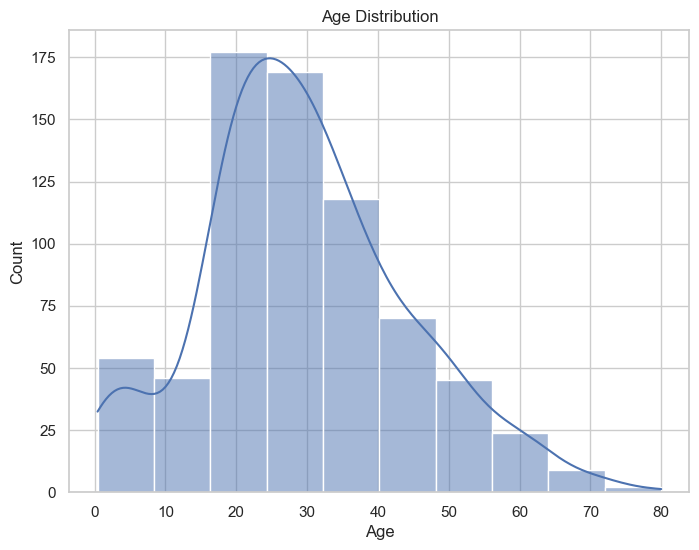

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

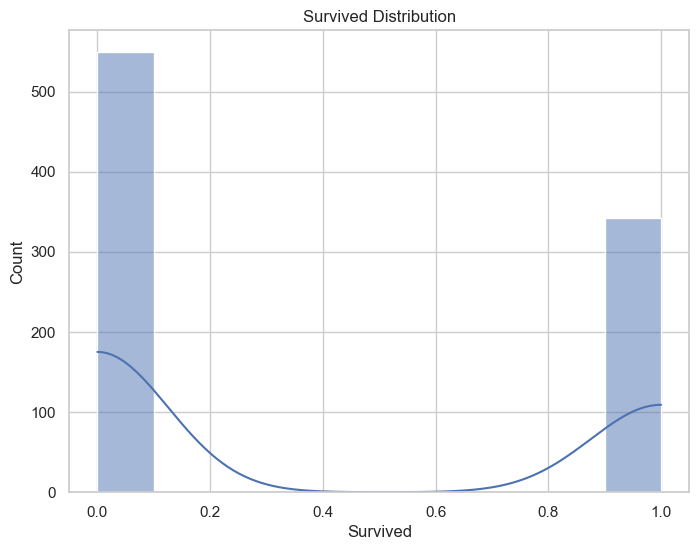

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['Survived'], bins=10, kde=True)
plt.title("Survived Distribution")
plt.show()

Dataset 'train.csv' loaded successfully.

Available columns for histogram:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Choose a column number to plot (or 0 to exit):  4


'Name' is not numeric. Please pick a numeric column.

Available columns for histogram:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Choose a column number to plot (or 0 to exit):  3
Number of bins? (default: 10):  8
Add KDE overlay? (y/n, default: y):  y


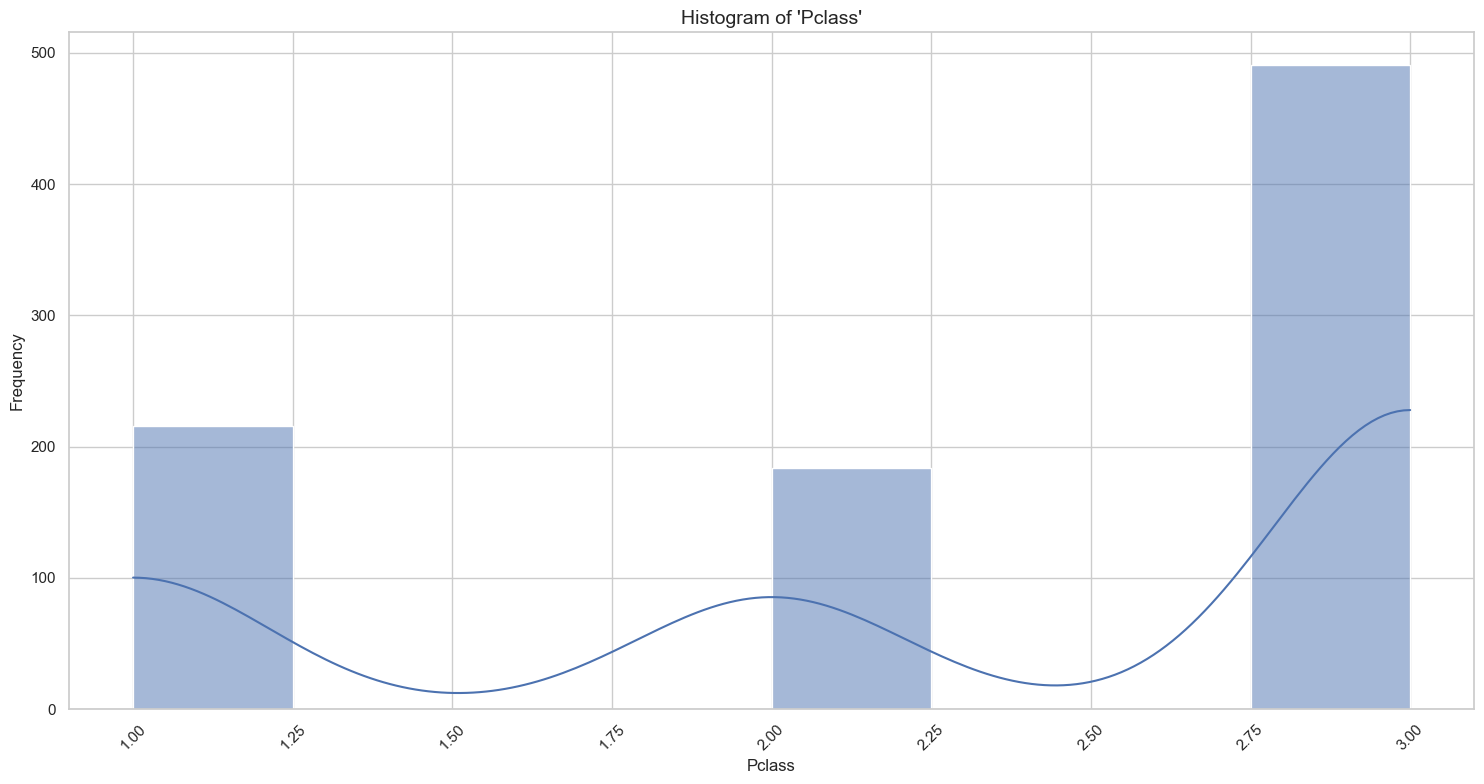


Available columns for histogram:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Choose a column number to plot (or 0 to exit):  0


Exiting histogram visualization tool.


In [20]:
#### def launch_histogram_tool(dataframe):
    """Interactive CLI tool to plot histograms of numerical data with optional KDE curves."""
    while True:
        print("\nAvailable columns for histogram:")
        for i, col in enumerate(dataframe.columns, start=1):
            print(f"{i}. {col}")
        try:
            selection = int(input("\nChoose a column number to plot (or 0 to exit): "))
            if selection == 0:
                print("Exiting histogram visualization tool.")
                break
            selected_column = dataframe.columns[selection - 1]
            if not pd.api.types.is_numeric_dtype(dataframe[selected_column]):
                print(f"'{selected_column}' is not numeric. Please pick a numeric column.")
                continue
            bins_input = input("Number of bins? (default: 10): ").strip()
            bins = int(bins_input) if bins_input.isdigit() else 10
            kde_input = input("Add KDE overlay? (y/n, default: y): ").strip().lower()
            include_kde = False if kde_input == 'n' else True
            plt.figure(figsize=(15, 8))  
            sns.histplot(data=dataframe, x=selected_column, bins=bins, kde=include_kde)
            plt.title(f"Histogram of '{selected_column}'", fontsize=14)
            plt.xlabel(selected_column)
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except (ValueError, IndexError):
            print("Invalid input. Please select a valid column number.")
if __name__ == "__main__":
    try:
        print("Dataset 'train.csv' loaded successfully.")
        launch_histogram_tool(df)
    except Exception as e:
        print(f"Error loading file: {e}")


Titanic dataset loaded successfully.

Available columns for plotting:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Select a column number to plot (0 to exit):  6


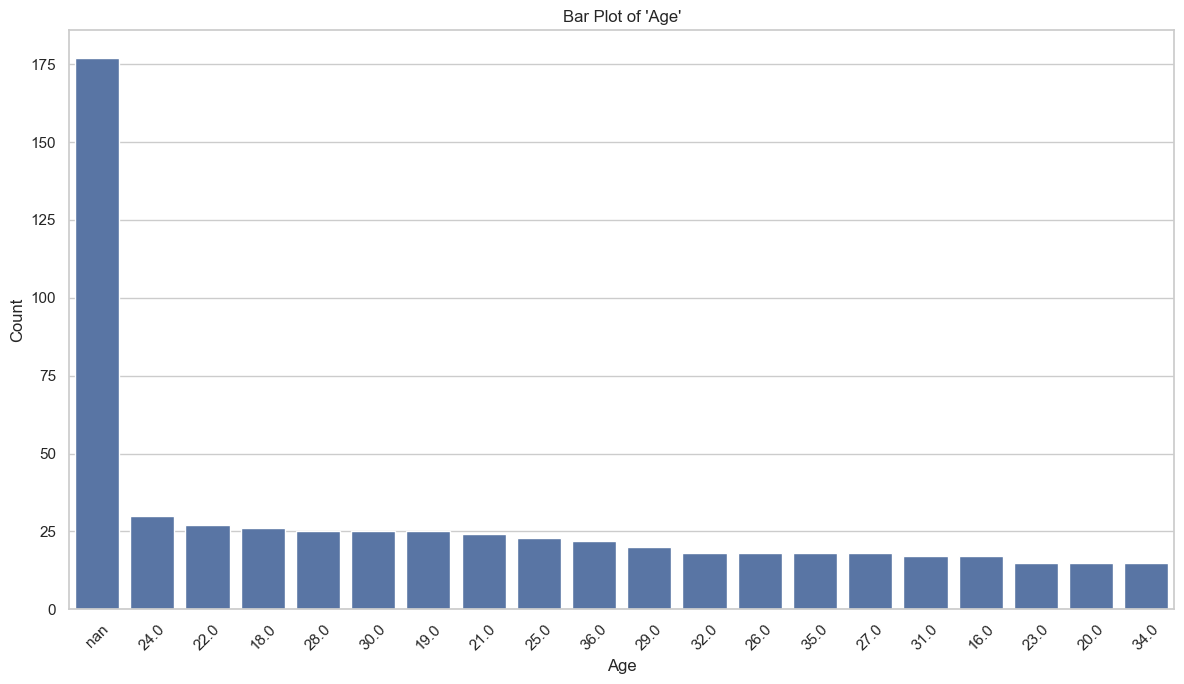


Available columns for plotting:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Select a column number to plot (0 to exit):  4


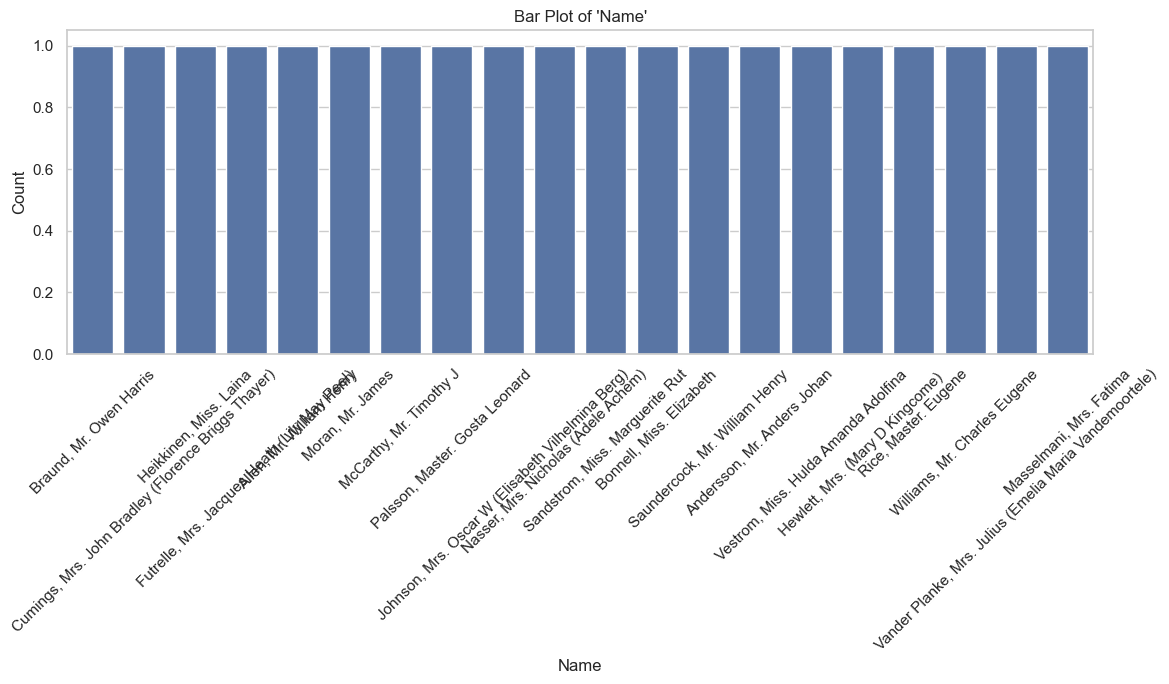


Available columns for plotting:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Select a column number to plot (0 to exit):  11


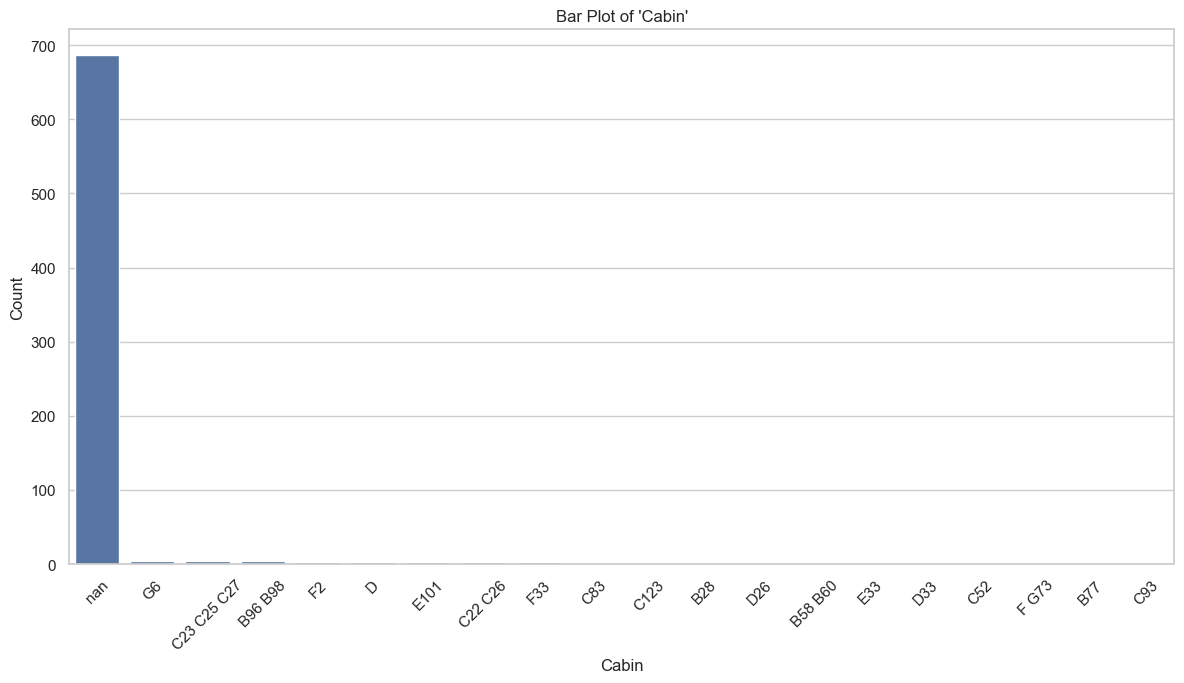


Available columns for plotting:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Select a column number to plot (0 to exit):  7


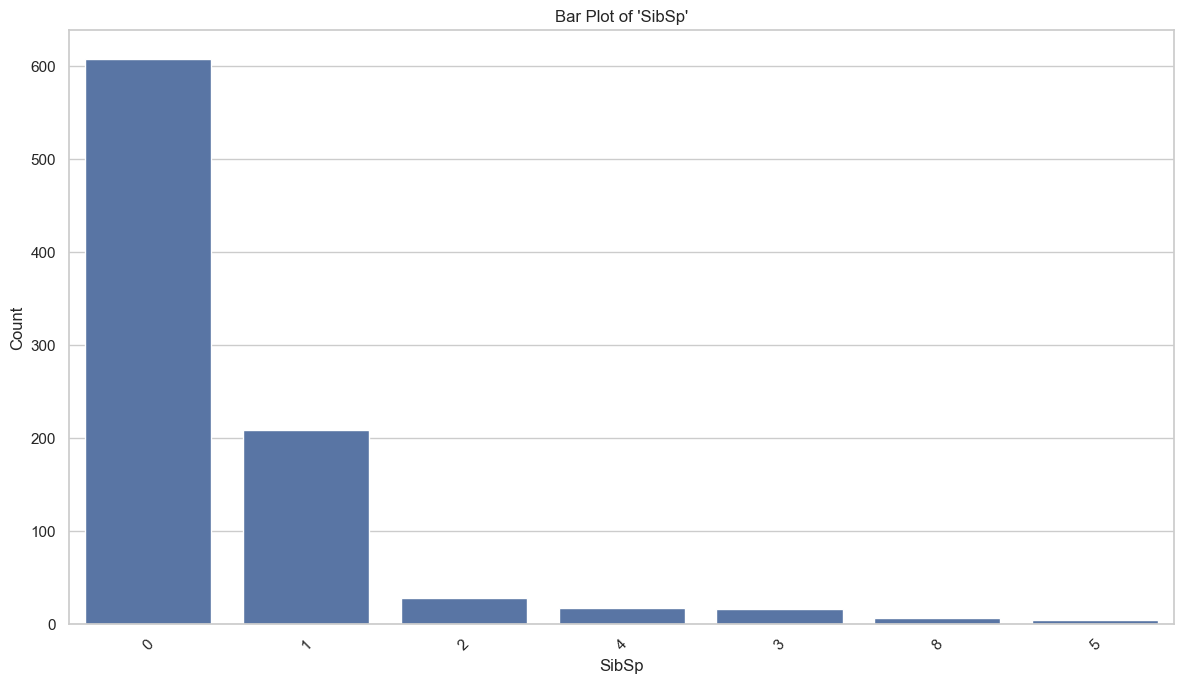


Available columns for plotting:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked



Select a column number to plot (0 to exit):  0


Exiting the bar plot tool.


In [26]:
def plot_all_columns_as_categorical(df):
    """Interactive bar plot tool that treats every column as categorical."""
    while True:
        print("\nAvailable columns for plotting:")
        for i, col in enumerate(df.columns, 1):
            print(f"{i}. {col}")
        try:
            choice = int(input("\nSelect a column number to plot (0 to exit): "))
            if choice == 0:
                print("Exiting the bar plot tool.")
                break
            selected_col = df.columns[choice - 1]
            value_counts = df[selected_col].astype(str).value_counts().head(20)  # Convert to string and take top 20
            plt.figure(figsize=(12, 7))
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f"Bar Plot of '{selected_col}'")
            plt.xlabel(selected_col)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except (ValueError, IndexError):
            print("Invalid input. Please enter a valid column number.")
if __name__ == "__main__":
    try:
        print("Titanic dataset loaded successfully.")
        plot_all_columns_as_categorical(df)
    except Exception as e:
        print(f"Could not load the dataset: {e}")


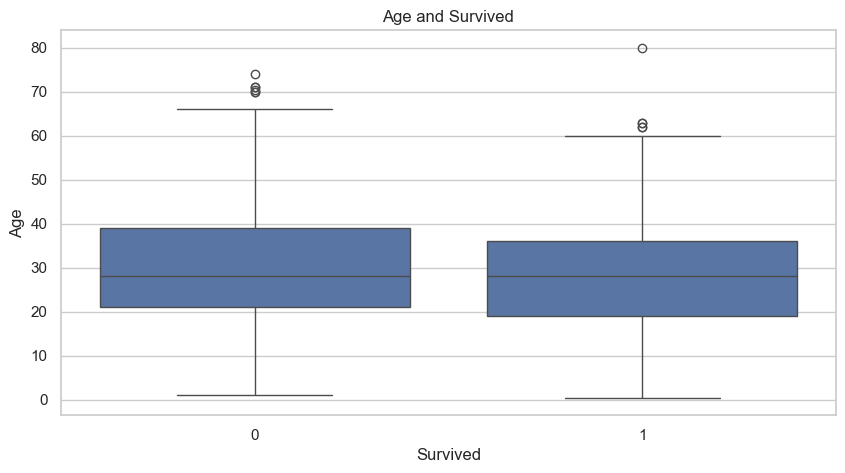

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age and Survived')
plt.show()

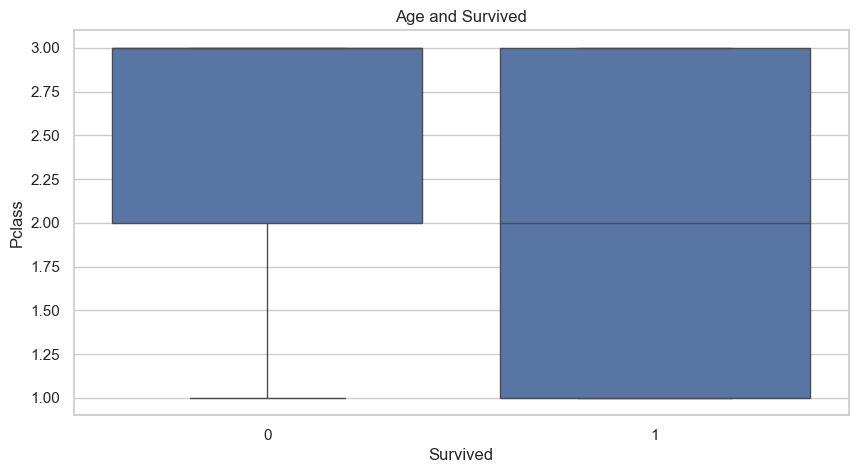

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Pclass', data=df)
plt.title('Age and Survived')
plt.show()

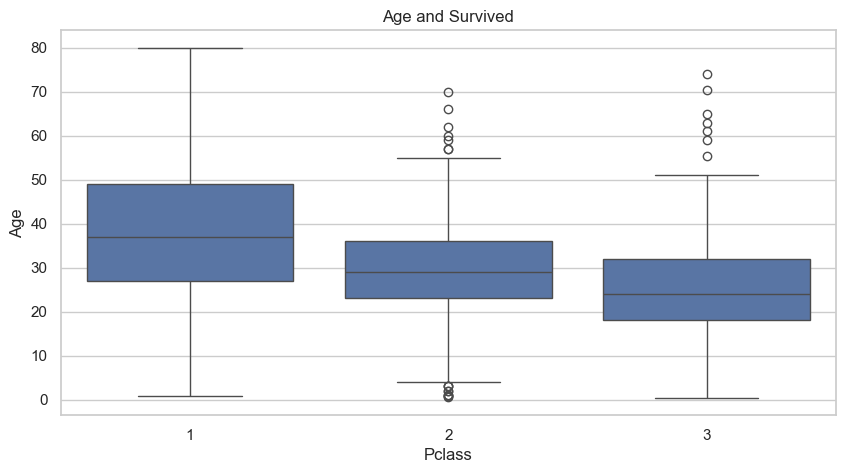

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age and Survived')
plt.show()

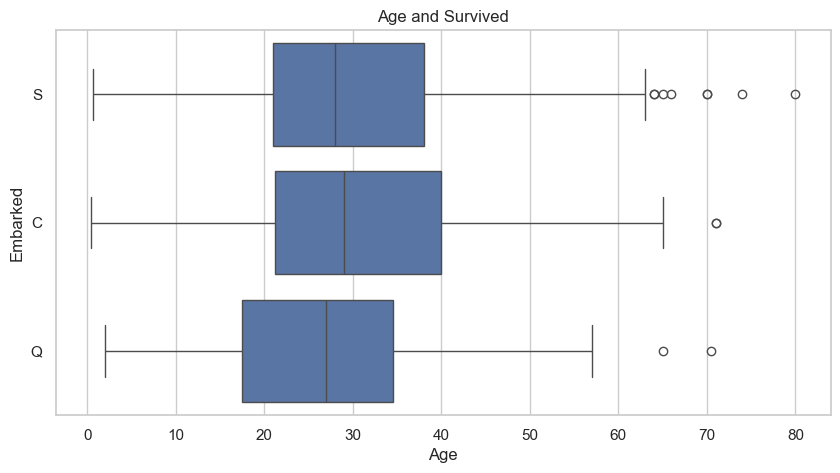

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age', y='Embarked', data=df)
plt.title('Age and Survived')
plt.show()

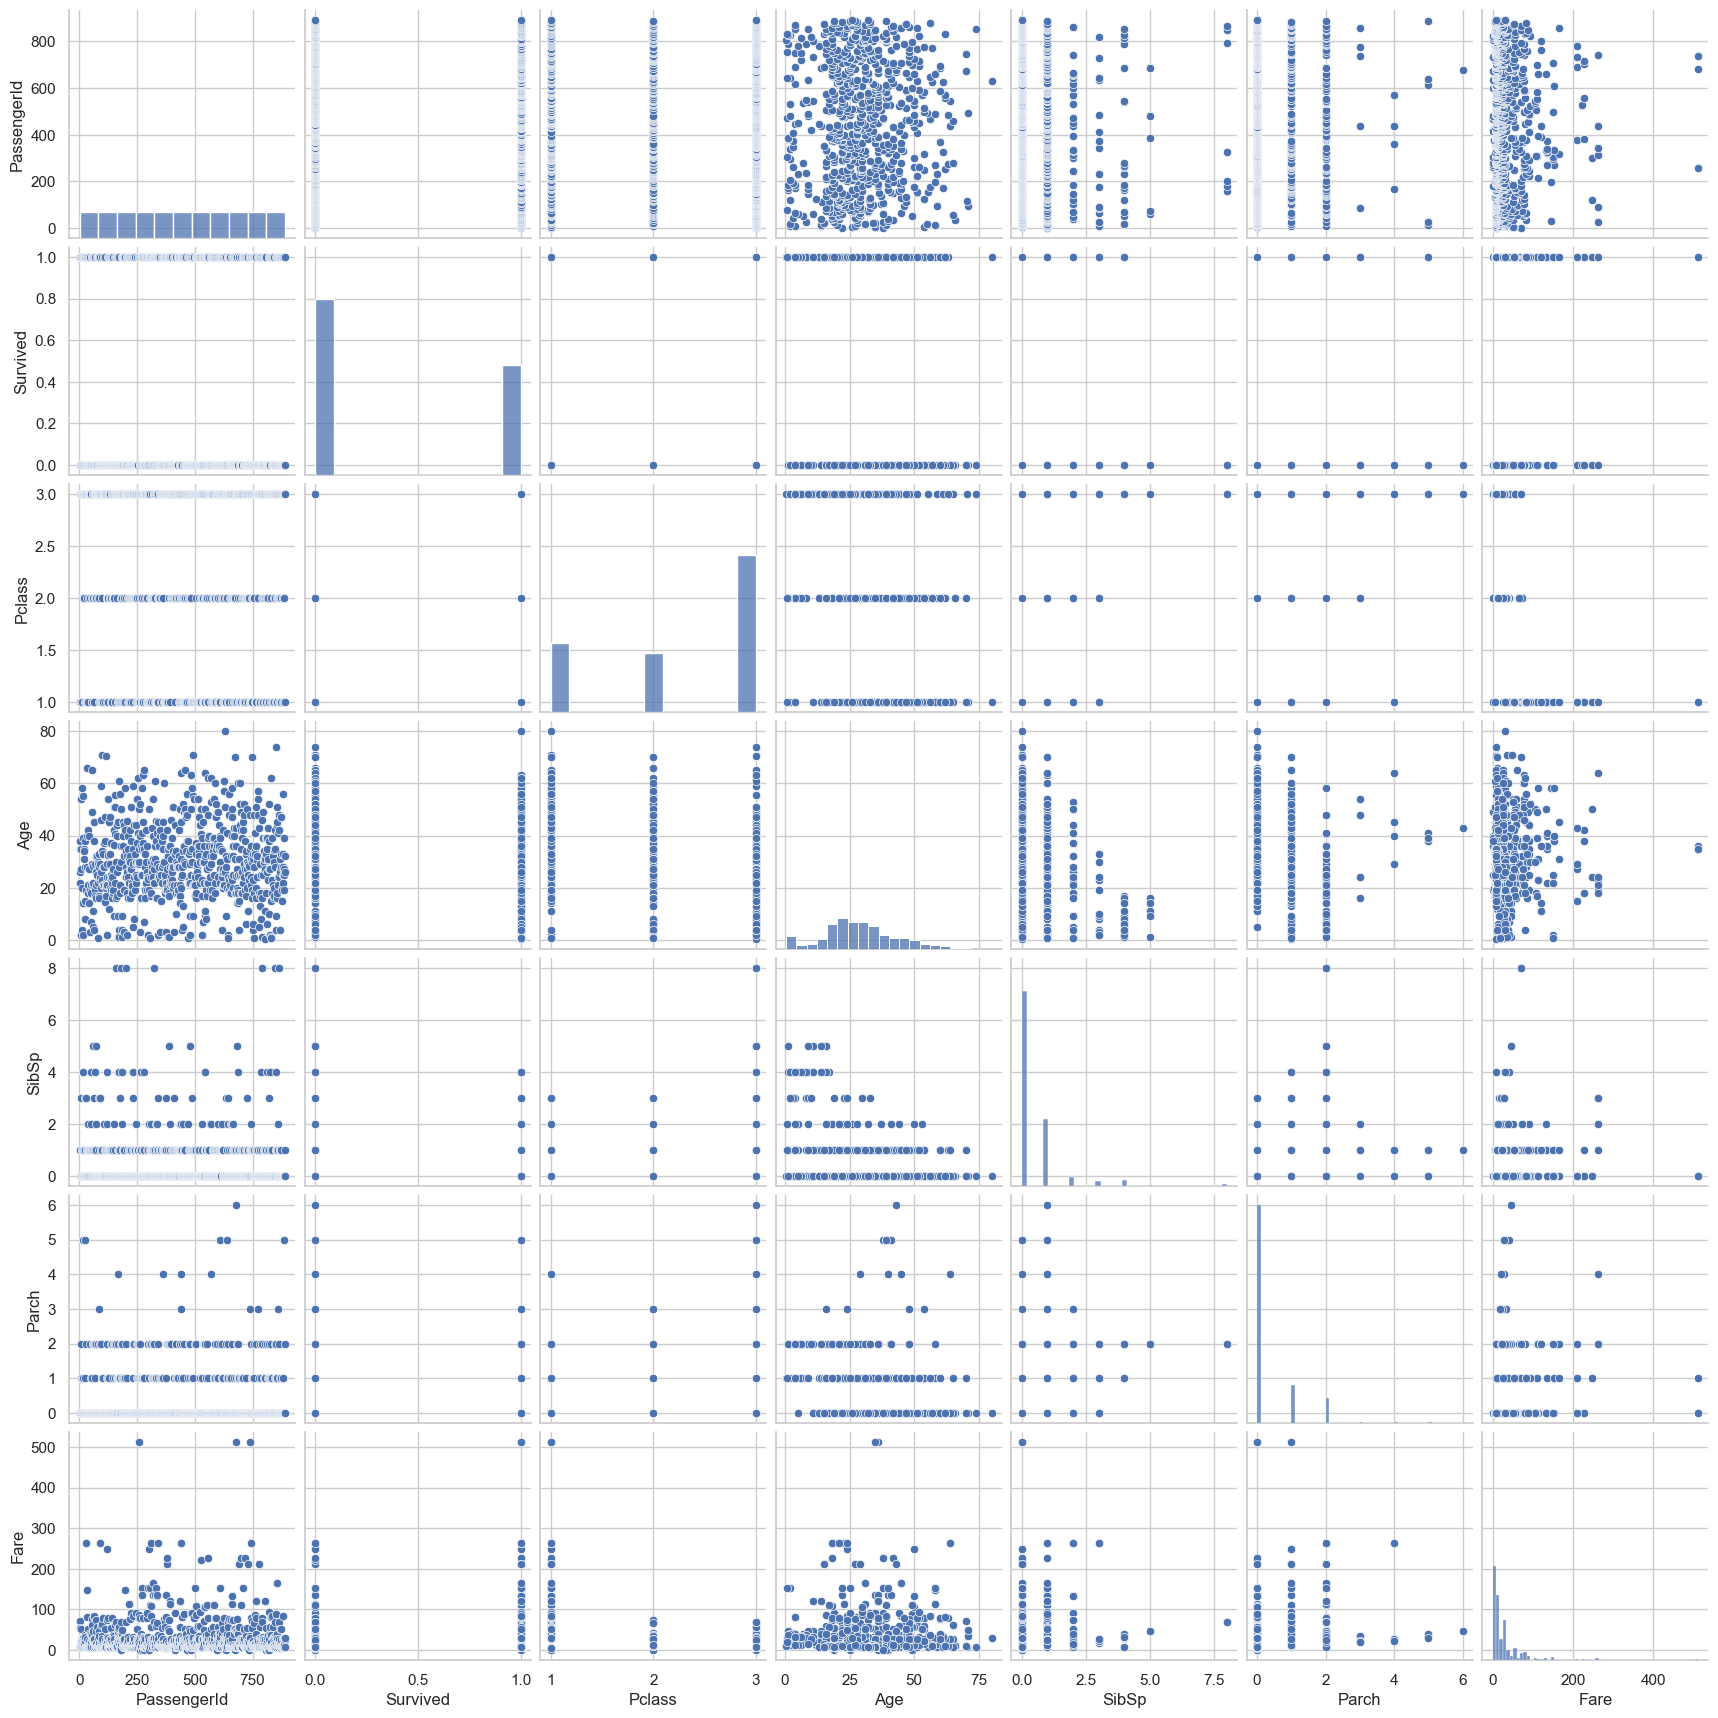

In [47]:
sns.pairplot(df)

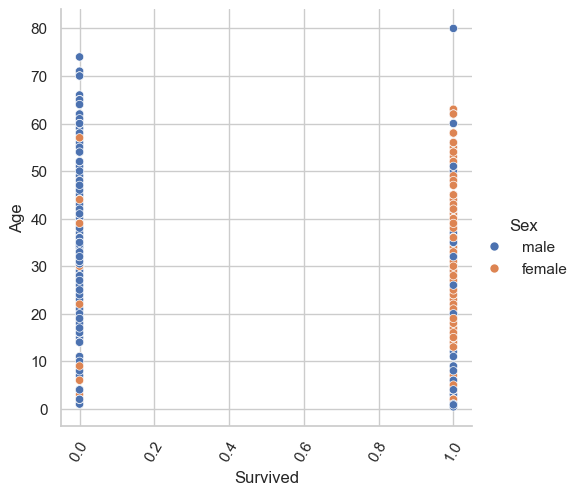

In [53]:
g = sns.relplot(x='Survived', y='Age', hue='Sex', data=df)
plt.setp(g.ax.get_xticklabels(), rotation=60)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10140\3305369760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=5)


<Axes: xlabel='Age', ylabel='Density'>

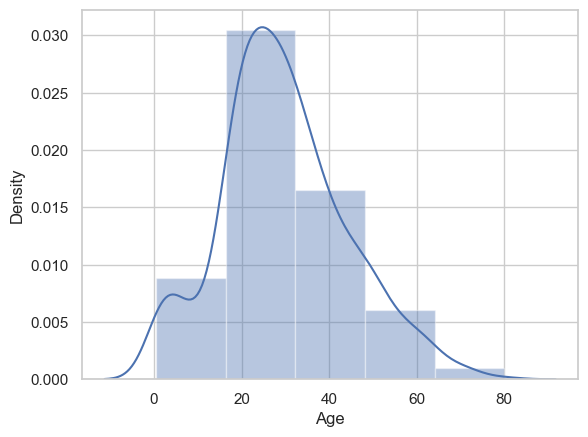

In [56]:
sns.distplot(df['Age'], bins=5)

C:\Users\user\AppData\Local\Temp\ipykernel_10140\3893395875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Survived'],bins=5)


<Axes: xlabel='Survived', ylabel='Density'>

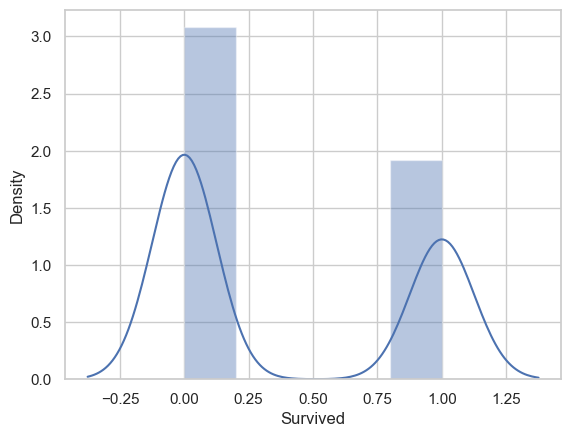

In [57]:
sns.distplot(df['Survived'],bins=5)

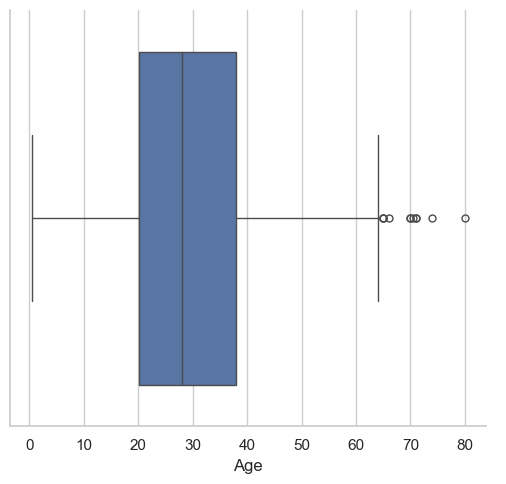

In [60]:
sns.catplot(x='Age' , kind='box' , data=df)